In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 加载数据
data = pd.read_csv('secondary_data.csv')

# 查看数据的基本信息
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [11]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


e:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


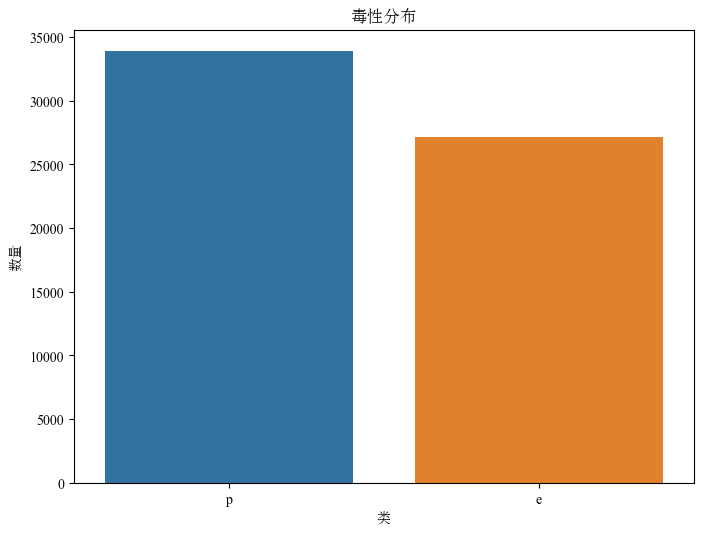

In [15]:

# 可视化蘑菇的可食用性分布
plt.figure(figsize=(8, 6),dpi=100)
sns.countplot(data['class'])
plt.title('毒性分布')
plt.xlabel('类')
plt.ylabel('数量')
plt.show()

## 随机森林

In [32]:
data.fillna(method='ffill', inplace=True)

# 编码分类变量
# 将所有类别变量编码为数值类型
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,...,4,7,11,0,4,1,2,7,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,...,4,7,11,0,4,1,2,7,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,...,4,7,11,0,4,1,2,7,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,...,4,7,11,0,4,1,5,7,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,...,4,7,11,0,4,1,5,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,5,7,11,0,3,2,2,3.93,...,2,1,12,0,4,0,1,2,0,0
61065,1,1.27,2,7,11,0,3,2,2,3.18,...,2,1,12,0,4,0,1,2,0,0
61066,1,1.27,5,7,11,0,3,2,2,3.86,...,2,1,12,0,4,0,1,2,0,2
61067,1,1.24,2,7,11,0,3,2,2,3.56,...,2,1,12,0,4,0,1,2,0,2


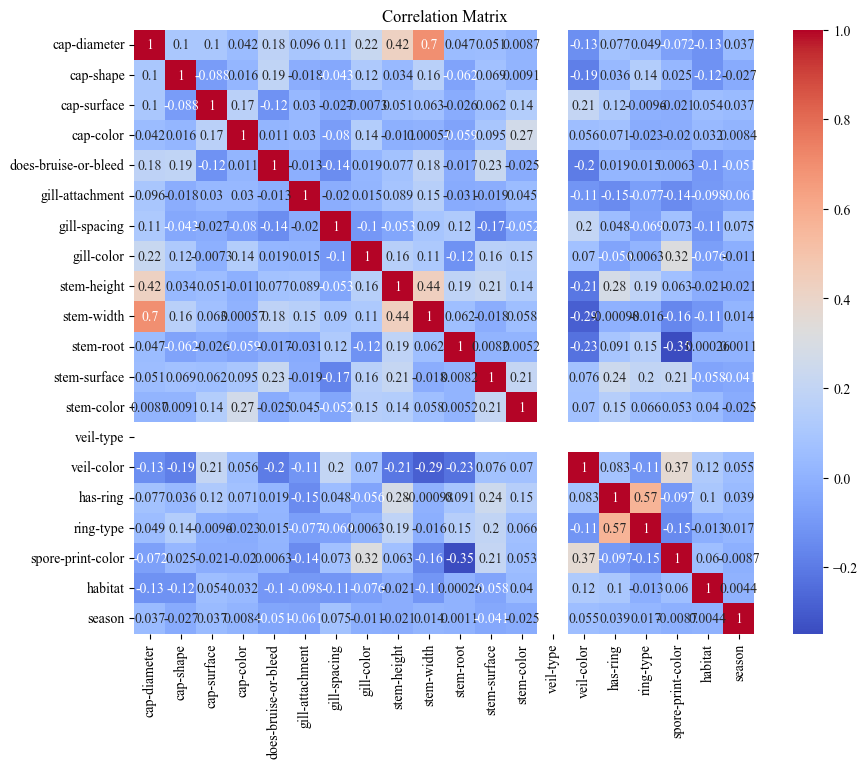

In [39]:
# 划分训练集和测试集
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8),dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

使用了热力图来可视化特征之间的相关性矩阵。

绘制了分类报告和混淆矩阵的热力图，以更直观地展示模型性能。

准确率: 0.9998362534796136
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



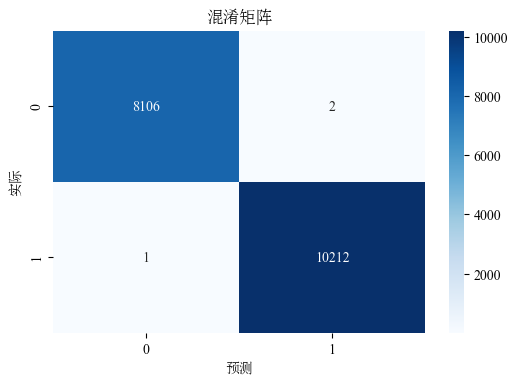

In [31]:


# 训练模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy}')

print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测")
plt.ylabel("实际")
plt.title("混淆矩阵")
plt.show()

## 决策树

Accuracy: 0.997762130888052
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321

Confusion Matrix:


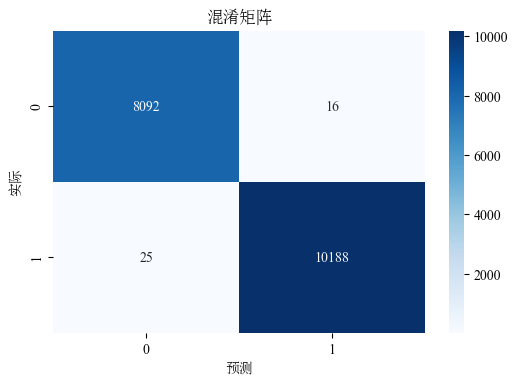

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy}')
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测")
plt.ylabel("实际")
plt.title("混淆矩阵")
plt.show()

## KNN

准确率: 0.9986900278369084
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



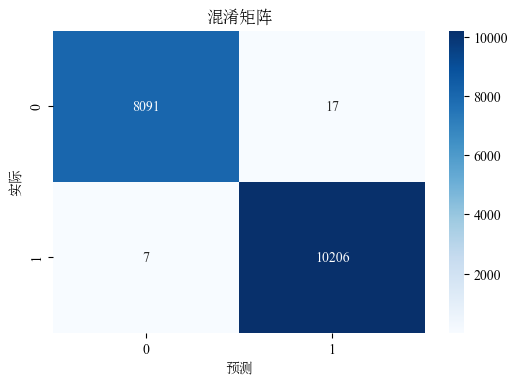

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy}')
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测")
plt.ylabel("实际")
plt.title("混淆矩阵")
plt.show()

## 朴素贝叶斯分类器

准确率: 0.6386660116805851
              precision    recall  f1-score   support

           0       0.63      0.46      0.53      8108
           1       0.64      0.78      0.71     10213

    accuracy                           0.64     18321
   macro avg       0.64      0.62      0.62     18321
weighted avg       0.64      0.64      0.63     18321



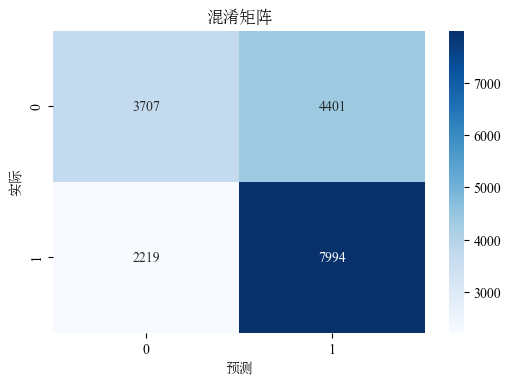

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测")
plt.ylabel("实际")
plt.title("混淆矩阵")
plt.show()

实验了四种不同的分类器：

随机森林分类器 (RandomForestClassifier)：使用了100棵树，准确率接近100%。

决策树分类器 (DecisionTreeClassifier)：准确率同样非常高，接近100%。

K近邻分类器 (KNeighborsClassifier)：使用了5个邻居，准确率略低于前两者，为99.87%。

高斯朴素贝叶斯分类器 (GaussianNB)：准确率显著低于其他模型，仅为63.87%。

## 结论

实验表明，对于蘑菇数据集，基于树的模型（如随机森林和决策树）和K近邻模型表现优异，而朴素贝叶斯模型则不太适合。